In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions.functions import EmissionProfile, AbsoluteMetricsPulseDefaultCO2, AbsoluteMetrics, RelativeMetrics
from climate_models.fair_emulator import BackgroundSpeciesQuantities, FaIRClimateModel, GWPStarEquivalentEmissionsFunction

## Parameters

In [2]:
studied_species = "Aviation NOx"
co2_method = 'IPCC' # IPCC or FaIR
start_year = 1765
t0 = 2020
time_horizon = 100
end_year = t0 + time_horizon
unit_value = 1e8 # [kg] or [km] for contrails

# Default values recommended for unit value
## CO2: 1e10 kg, i.e. 10 Mt
## Contrails: 1 km
## NOx:
## H2O: 1e10 kg, i.e. 10 Mt
## Soot:
## Sulfur:

In [3]:
if studied_species == "Aviation CO2":
    sensitivity_erf = 0 # Not used
    ratio_erf_rf = 1
elif studied_species == "Aviation contrails":
    sensitivity_erf = 9.36e-13
    ratio_erf_rf = 0.42
elif studied_species == "Aviation NOx":
    sensitivity_erf = [34.4e-12 * (14/46), -9.3e-12 * (14/46), -18.7e-12 * (14/46), -2.8e-12 * (14/46)]
    ratio_erf_rf = [1.37, 1.18, 1.18, 1.18]
elif studied_species == "Aviation NOx ST O3 increase":
    sensitivity_erf = 34.4e-12 * (14/46)
    ratio_erf_rf = 1.37
elif studied_species == "Aviation NOx LT O3 decrease":
    sensitivity_erf = -9.3e-12 * (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation NOx CH4 decrease":
    sensitivity_erf = -18.7e-12 * (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation NOx SWV decrease":
    sensitivity_erf = -2.8e-12 * (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation H2O":
    sensitivity_erf = 0.0052e-12
    ratio_erf_rf = 1
elif studied_species == "Aviation soot":
    sensitivity_erf = 100.7e-12 # Not used
    ratio_erf_rf = 1
elif studied_species == "Aviation sulfur":
    sensitivity_erf = -19.9e-12 # Not used
    ratio_erf_rf = 1
    
sensitivity_erf_co2 = 0 # Not used
ratio_erf_rf_co2 = 1

## Metrics calculation

In [4]:
background_species_quantities = BackgroundSpeciesQuantities(start_year, end_year, rcp='RCP45')
emission_profile = EmissionProfile(start_year,t0,time_horizon, 'step', unit_value)

In [5]:
radiative_forcing, effective_radiative_forcing, temperature = FaIRClimateModel(start_year, end_year, background_species_quantities, emission_profile, studied_species, sensitivity_erf, ratio_erf_rf)

[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

Running 1 projections in parallel:   0%|          | 0/355 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/355 [00:00<?, ?timesteps/s]

In [6]:
if co2_method == 'IPCC':
    radiative_forcing_co2, agwp_co2, aegwp_co2, temperature_co2, agtp_co2, iagtp_co2, atr_co2 = AbsoluteMetricsPulseDefaultCO2(time_horizon, unit_value)
elif co2_method == 'FaIR':
    radiative_forcing_co2, effective_radiative_forcing_co2, temperature_co2 = FaIRClimateModel(start_year, end_year, background_species_quantities, emission_profile, "Aviation CO2", sensitivity_erf_co2, ratio_erf_rf_co2)
    agwp_co2, aegwp_co2, agtp_co2, iagtp_co2, atr_co2 = AbsoluteMetrics(radiative_forcing_co2, effective_radiative_forcing_co2, temperature_co2, time_horizon)
agwp, aegwp, agtp, iagtp, atr = AbsoluteMetrics(radiative_forcing, effective_radiative_forcing, temperature, time_horizon)
gwp, egwp, gtp, igtp, ratr = RelativeMetrics(agwp_co2, aegwp_co2, agtp_co2, iagtp_co2, atr_co2, agwp, aegwp, agtp, iagtp, atr)

In [7]:
index_noms = ["GWP", "E-GWP", "GTP", "iGTP", "r-ATR"]
df = pd.DataFrame([gwp, egwp, gtp, igtp, ratr], columns=["Value"], index=index_noms)
df

,Value
GWP,1146.653435
E-GWP,1407.517092
GTP,547.061774
iGTP,1036.622258
r-ATR,1036.622258


## Analysis (for CO2)

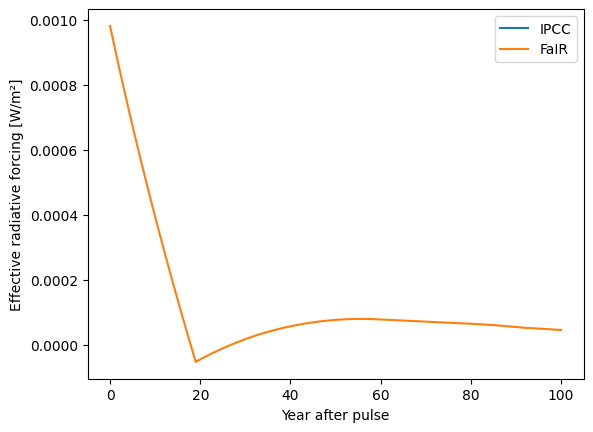

In [8]:
plt.plot(radiative_forcing_co2[t0-start_year:end_year], label='IPCC')
plt.plot(effective_radiative_forcing[t0-start_year:end_year], label='FaIR')
plt.xlabel('Year after pulse')
plt.ylabel('Effective radiative forcing [W/m²]')
plt.legend()

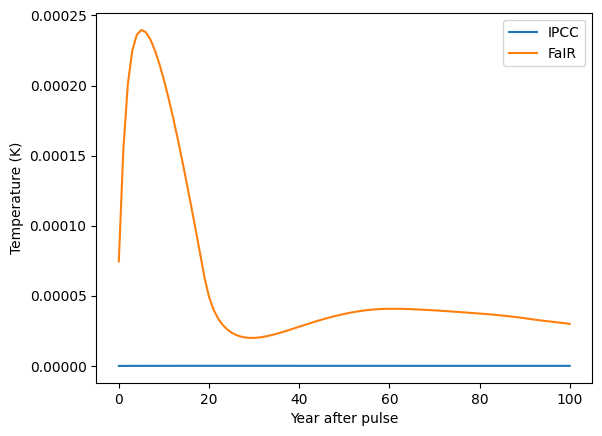

In [9]:
plt.plot(temperature_co2, label='IPCC')
plt.plot(temperature[t0-start_year:end_year], label='FaIR')
plt.xlabel('Year after pulse')
plt.ylabel('Temperature (K)')
plt.legend()

In [10]:
time = [k for k in range(0,time_horizon+1)]
agwp_pulse = np.zeros(len(time))
for k in range(0,time_horizon+1):
    agwp_pulse[k] = time[k]*radiative_forcing[t0-start_year+k]/(agwp_co2)

C:\Users\t.planes\AppData\Local\Temp\ipykernel_16580\2823339080.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  agwp_pulse[k] = time[k]*radiative_forcing[t0-start_year+k]/(agwp_co2)


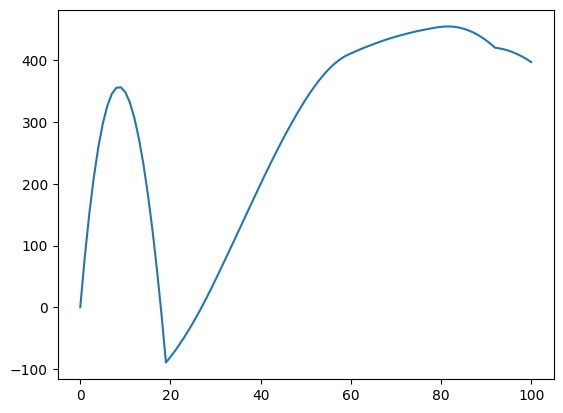

In [11]:
plt.plot(agwp_pulse, label='IPCC')

In [12]:
iagtp_pulse = temperature[t0-start_year:end_year]/(iagtp_co2)

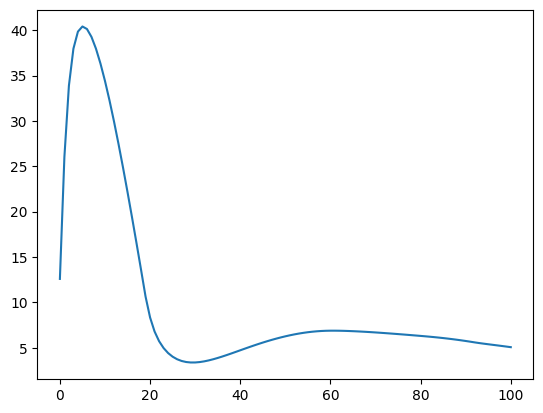

In [13]:
plt.plot(iagtp_pulse, label='IPCC')